<a href="https://colab.research.google.com/github/IssamBenamara/SIFT_BOW/blob/master/RDFIA_tme5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip tp4-5.zip

Archive:  tp4-5.zip
  inflating: circles.mat             
  inflating: circles.py              
  inflating: mnist.mat               
  inflating: tme5.py                 


In [0]:
import math
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
from tme5 import CirclesData

In [0]:
def init_params(nx, nh, ny):
    import torch.distributions as tdist
    params = {}

    n = tdist.Normal(0,0.3)

    params["Wh"] = n.sample( (nx, nh) )
    params["bh"] = n.sample( (1, nh) )
    
    params["Wy"] = n.sample( (nh, ny) )
    params["by"] = n.sample( (1, ny) )
    
    return params

In [24]:
input_size = 5
hidden_size = 3
output_size = 2
params = init_params(nx = input_size, nh = hidden_size, ny = output_size)
print(params)

{'Wh': tensor([[-0.0168,  0.4477,  0.1034],
        [-0.1008,  0.3060, -0.2346],
        [-0.1070,  0.1533,  0.1009],
        [ 0.0665, -0.1851, -0.0498],
        [-0.0209,  0.2745, -0.1339]]), 'bh': tensor([[0.1214, 0.0913, 0.1251]]), 'Wy': tensor([[-0.3117, -0.5175],
        [-0.0653,  0.2540],
        [-0.2492,  0.1644]]), 'by': tensor([[-0.1176, -0.2474]])}


In [0]:
def forward(params, X):
    outputs = {}

    outputs["X"] = X
    outputs["htilde"] = torch.matmul( X, params['Wh'] ) + params['bh']
    outputs["h"] = torch.tanh( outputs["htilde"] )
    outputs["ytilde"] = torch.matmul( outputs["h"], params['Wy'] ) + params['by']
    outputs["yhat"] = torch.softmax( outputs["ytilde"], dim=-1 )

    return outputs['yhat'], outputs

In [28]:
batch_size = 3
outputs = forward(params, torch.randn((batch_size,input_size)))
outputs

(tensor([[0.6143, 0.3857],
         [0.5037, 0.4963],
         [0.4349, 0.5651]]),
 {'X': tensor([[-2.2286, -0.0592,  0.8460,  1.5853,  1.1930],
          [-0.3494,  0.6528,  1.3633,  0.8864,  1.9019],
          [ 1.3015, -0.4769,  1.3780,  0.0609,  0.0403]]),
  'h': tensor([[ 0.1535, -0.6416, -0.2399],
          [-0.0651,  0.6054, -0.2216],
          [ 0.0034,  0.6286,  0.4638]]),
  'htilde': tensor([[ 0.1548, -0.7609, -0.2447],
          [-0.0652,  0.7017, -0.2253],
          [ 0.0034,  0.7391,  0.5021]]),
  'yhat': tensor([[0.6143, 0.3857],
          [0.5037, 0.4963],
          [0.4349, 0.5651]]),
  'ytilde': tensor([[-0.0638, -0.5292],
          [-0.0816, -0.0963],
          [-0.2753, -0.0132]])})

In [0]:
def loss_accuracy(Yhat, Y):
    L = 0
    acc = 0

    L = -torch.sum(Y*torch.log(Yhat))
    _, indsY = torch.max(Y,dim=-1)
    _, indsYhat = torch.max(Yhat,dim=-1)
    acc = torch.mean((indsY == indsYhat).double())

    return L, acc

In [44]:
Yhat = outputs[1]['yhat']
OneHot_Matrix = np.eye( output_size )[ np.random.choice( output_size, Yhat.shape[0] ) ]
Y = torch.Tensor(OneHot_Matrix)

loss_accuracy(Yhat, Y)

(tensor(2.2239), tensor(0.3333, dtype=torch.float64))

In [0]:
def backward(params, outputs, Y):
    grads = {}

    # TODO remplir avec les paramètres Wy, Wh, by, bh
    # grads["Wy"] = ...

    return grads

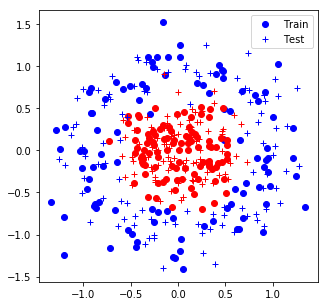

NameError: ignored

In [3]:









def backward(params, outputs, Y):
    grads = {}

    # TODO remplir avec les paramètres Wy, Wh, by, bh
    # grads["Wy"] = ...

    return grads

def sgd(params, grads, eta):
    # TODO mettre à jour le contenu de params

    return params



if __name__ == '__main__':

    # init
    data = CirclesData()
    data.plot_data()
    N = data.Xtrain.shape[0]
    Nbatch = 10
    nx = data.Xtrain.shape[1]
    nh = 10
    ny = data.Ytrain.shape[1]
    eta = 0.03

    # Premiers tests, code à modifier
    params = init_params(nx, nh, xy)
    Yhat, outs = forward(params, data.Xtrain)
    L, _ = loss_accuracy(Yhat, Y)
    grads = backward(params, outputs, Y)
    params = sgd(params, grads, eta)

    # TODO apprentissage

    # attendre un appui sur une touche pour garder les figures
    input("done")

In [0]:
data.Ytrain

tensor([[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1